<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Grocery_Data_Analysis_and_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [3]:
# Importing the dataset
dataset = pd.read_csv("/content/GroceryDataset.csv")


In [4]:
# Displaying the first few rows of the dataset
print(dataset.head())


        Sub Category     Price     Discount  \
0  Bakery & Desserts   $56.99   No Discount   
1  Bakery & Desserts  $159.99   No Discount   
2  Bakery & Desserts   $44.99   No Discount   
3  Bakery & Desserts   $39.99   No Discount   
4  Bakery & Desserts   $59.99   No Discount   

                                            Rating  \
0   Rated 4.3 out of 5 stars based on 265 reviews.   
1       Rated 5 out of 5 stars based on 1 reviews.   
2   Rated 4.1 out of 5 stars based on 441 reviews.   
3  Rated 4.7 out of 5 stars based on 9459 reviews.   
4   Rated 4.5 out of 5 stars based on 758 reviews.   

                                               Title Currency  \
0  David’s Cookies Mile High Peanut Butter Cake, ...        $   
1  The Cake Bake Shop 8" Round Carrot Cake (16-22...        $   
2  St Michel Madeleine, Classic French Sponge Cak...        $   
3  David's Cookies Butter Pecan Meltaways 32 oz, ...        $   
4  David’s Cookies Premier Chocolate Cake, 7.2 lb...        $   

 

In [19]:
dataset.count()

Sub Category           1757
Price                  1757
Discount               1757
Rating                 1757
Title                  1757
Currency               1757
Feature                1757
Product Description    1757
dtype: int64

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1757 non-null   object 
 1   Price                1757 non-null   float64
 2   Discount             1757 non-null   int64  
 3   Rating               1757 non-null   float64
 4   Title                1757 non-null   object 
 5   Currency             1757 non-null   int64  
 6   Feature              1757 non-null   object 
 7   Product Description  1757 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 109.9+ KB


In [21]:
dataset.describe()

,Price,Discount,Rating,Currency
count,1757.000000,1757.000000,1757.000000,1757.0
mean,56.223244,38.470120,4.340357,0.0
std,87.095104,5.951095,0.302086,0.0
min,1.000000,0.000000,1.000000,0.0
25%,14.990000,40.000000,4.340357,0.0
50%,23.990000,40.000000,4.340357,0.0
75%,49.990000,40.000000,4.340357,0.0
max,999.990000,41.000000,5.000000,0.0


In [22]:
dataset.iloc

In [5]:
# Checking for missing values
print(dataset.isnull().sum())

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64


In [6]:
# Cleaning and preprocessing the data
# Handling missing values
dataset['Price'].fillna(dataset['Price'].mode()[0], inplace=True)
dataset['Currency'].fillna(dataset['Currency'].mode()[0], inplace=True)
dataset['Feature'].fillna('No Feature', inplace=True)
dataset['Product Description'].fillna('No Description', inplace=True)
dataset['Rating'].fillna('No Rating', inplace=True)

In [7]:
# Encoding categorical variables
label_encoder = LabelEncoder()
dataset['Discount'] = label_encoder.fit_transform(dataset['Discount'])
dataset['Currency'] = label_encoder.fit_transform(dataset['Currency'])


In [8]:
# Extracting numerical values from the 'Rating' column
dataset['Rating'] = dataset['Rating'].str.extract('(\d+\.\d+|\d+)').astype(float)
dataset['Rating'].fillna(dataset['Rating'].mean(), inplace=True)

In [9]:
# Feature engineering: Extracting numerical values from 'Price'
dataset['Price'] = dataset['Price'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [10]:
# Splitting the dataset into features (X) and target variable (y)
X = dataset.iloc[:, [2, 3, 5]].values
y = dataset.iloc[:, 1].values


In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Building the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [14]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6976.1515009425375


In [15]:
# Visualizing the results
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Predicted Prices')

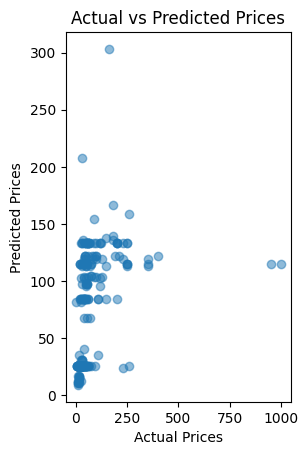

In [16]:
# Scatter plot of actual vs predicted prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

Text(0.5, 0, 'Importance')

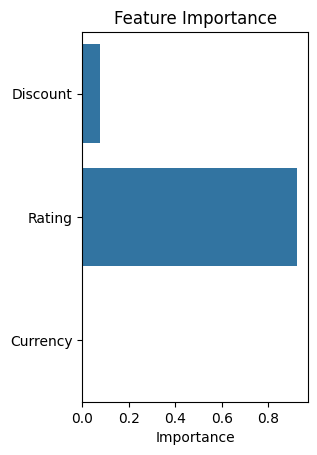

In [17]:
# Feature importance plot
plt.subplot(1, 2, 2)
feature_importance = regressor.feature_importances_
features = ['Discount', 'Rating', 'Currency']
sns.barplot(x=feature_importance, y=features, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>